In [6]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from chembl_webresource_client.new_client import new_client
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski

In [2]:
df_cleaned = pd.read_csv('data/cleaned_bioactivity_data.csv')

In [4]:
df_2class = df_cleaned[df_cleaned['bioactivity_class'] != 'intermediate']

In [53]:
def freq_graph(df):
    
    plt.figure(figsize=(5.5, 5.5))
    ax = sns.countplot(x='bioactivity_class', data=df, edgecolor='black')
    ax.set_xlabel('Bioactivity Class', fontsize=14, fontweight='bold')
    ax.set_ylabel('Frequency', fontsize=14, fontweight='bold')
    
    #Add percentages to graph
    num_active = len(df[df['bioactivity_class'] == 'active'])
    num_inactive = len(df[df['bioactivity_class'] == 'inactive'])
    total = len(df)
    percentage = [(num_active/total)*100, (num_inactive/total)*100]
    patches = ax.patches
    for i in range(len(patches)):
        x = patches[i].get_x() + patches[i].get_width()/2
        y = patches[i].get_height()+2
        ax.annotate('{:.1f}%'.format(percentage[i]), (x, y), ha='center')

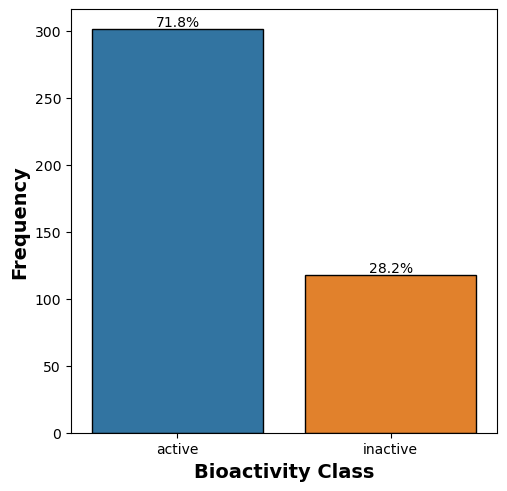

In [52]:
freq_graph(df_2class)

In [54]:
def logP_vs_mw_graph(df):
    plt.figure(figsize=(5.5, 5.5))
    sns.scatterplot(x='MW', y='LogP', data=df, hue='bioactivity_class', size='pIC50', edgecolor='black', alpha=0.7)
    plt.xlabel('MW', fontsize=14, fontweight='bold')
    plt.ylabel('LogP', fontsize=14, fontweight='bold')
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)

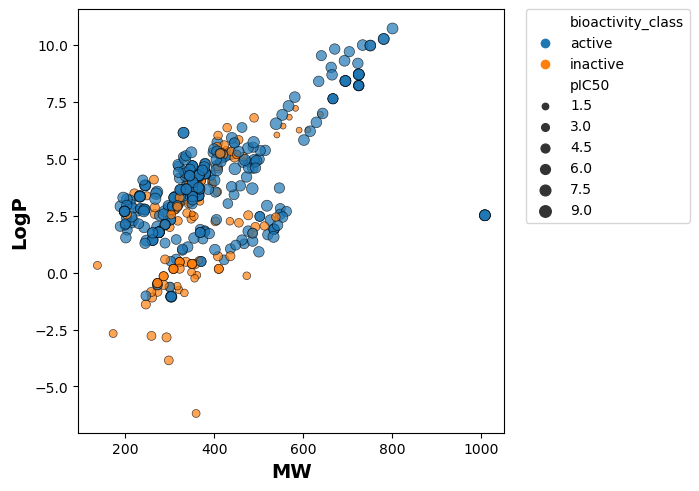

In [55]:
logP_vs_mw_graph(df_2class)

In [61]:
def mannwhitney(descriptor, df, verbose=False):
  # https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/
  from numpy.random import seed
  from numpy.random import randn
  from scipy.stats import mannwhitneyu

# seed the random number generator
  seed(1)

# actives and inactives
  selection = [descriptor, 'bioactivity_class']
  df_selection = df[selection]
  active = df_selection[df_selection['bioactivity_class'] == 'active']
  active = active[descriptor]

  selection = [descriptor, 'bioactivity_class']
  df_selection = df[selection]
  inactive = df_selection[df_selection['bioactivity_class'] == 'inactive']
  inactive = inactive[descriptor]

# compare samples
  stat, p = mannwhitneyu(active, inactive)
  #print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
  alpha = 0.05
  if p > alpha:
    interpretation = 'Same distribution (fail to reject H0)'
  else:
    interpretation = 'Different distribution (reject H0)'
  
  results = pd.DataFrame({'Descriptor':descriptor,
                          'Statistics':stat,
                          'p':p,
                          'alpha':alpha,
                          'Interpretation':interpretation}, index=[0])
  # filename = 'mannwhitneyu_' + descriptor + '.csv'
  # results.to_csv(filename)

  return results

In [56]:
def box_plotter(df, y_data, y_label):

    plt.figure(figsize=(5.5, 5.5))
    sns.boxplot(x = 'bioactivity_class', y = y_data, data = df)
    plt.xlabel('Bioactivity Class', fontsize=14, fontweight='bold')
    plt.ylabel(y_label, fontsize=14, fontweight='bold')

,Descriptor,Statistics,p,alpha,Interpretation
0,pIC50,0.0,1.898557e-57,0.05,Different distribution (reject H0)


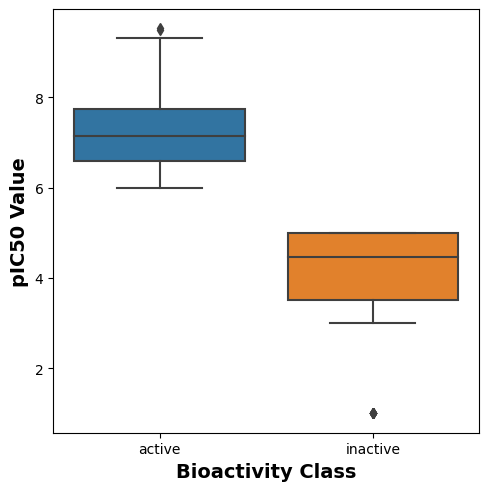

In [62]:
box_plotter(df_2class,'pIC50', 'pIC50 Value')
mannwhitney('pIC50', df_2class)

,Descriptor,Statistics,p,alpha,Interpretation
0,MW,16444.5,0.119285,0.05,Same distribution (fail to reject H0)


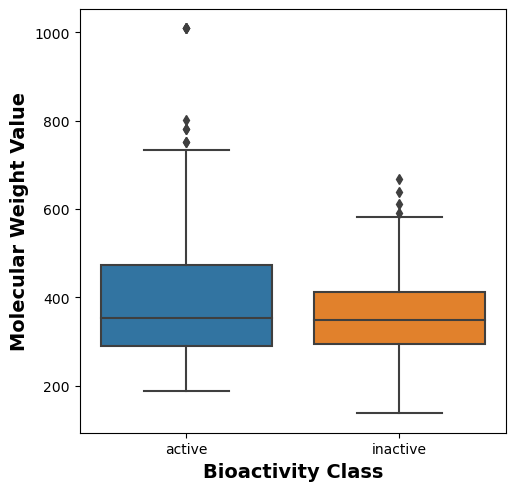

In [63]:
box_plotter(df_2class,'MW', 'Molecular Weight Value')
mannwhitney('MW', df_2class)

,Descriptor,Statistics,p,alpha,Interpretation
0,LogP,12121.0,2.135665e-07,0.05,Different distribution (reject H0)


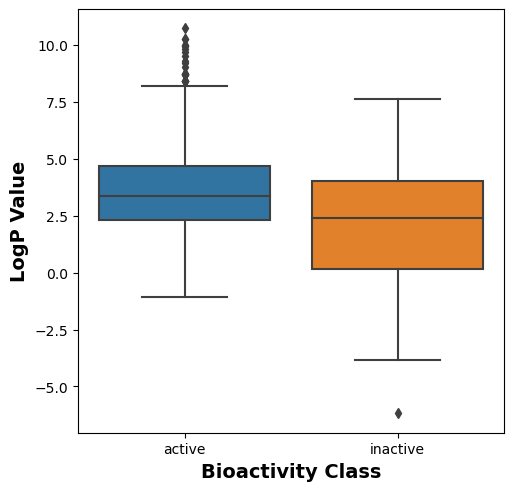

In [65]:
box_plotter(df_2class,'LogP', 'LogP Value')
mannwhitney('LogP', df_2class)

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHDonors,17133.0,0.267885,0.05,Same distribution (fail to reject H0)


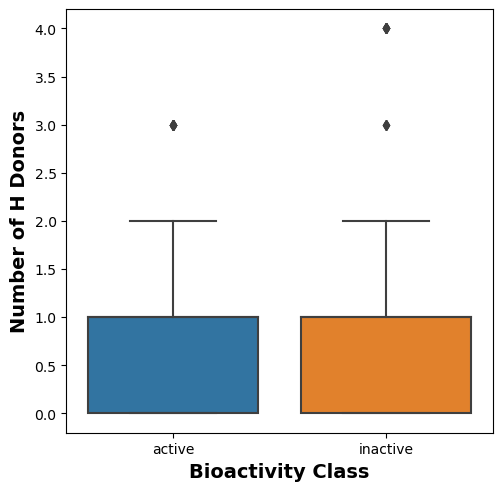

In [66]:
box_plotter(df_2class,'NumHDonors', 'Number of H Donors')
mannwhitney('NumHDonors', df_2class)

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHAcceptors,16733.5,0.171319,0.05,Same distribution (fail to reject H0)


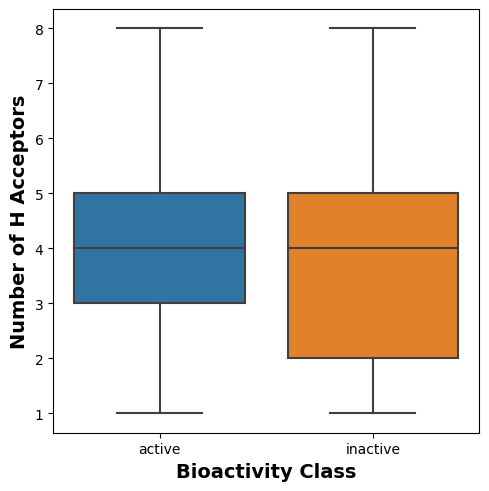

In [67]:
box_plotter(df_2class,'NumHAcceptors', 'Number of H Acceptors')
mannwhitney('NumHAcceptors', df_2class)